### Number Prediction

In [1]:
# Gerekli kütüphaneleri import edin
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# MNIST veri setini yükleyin
mnist = fetch_openml('mnist_784', version=1, parser='pandas')

In [3]:
# Veri setinin boyutunu kontrol edin
print(mnist.data.shape)

(70000, 784)


In [4]:
# Veri setinden bir örnek resmi gösteren fonksiyonu tanımlayın
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()


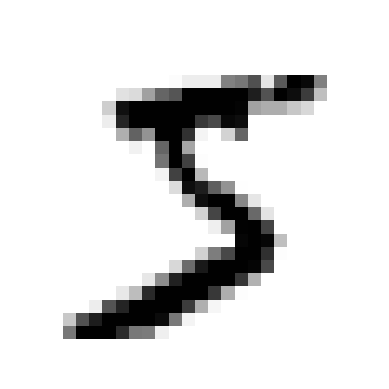

In [5]:
# Veri setinden bir örnek resmi gösterin
showimage(mnist.data, 0)

In [6]:
# Train-test ayrımını yapın
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [7]:
# Veri tiplerini kontrol edin
print(type(train_img))

<class 'pandas.core.frame.DataFrame'>


In [8]:
# Test veri seti için bir kopya oluşturun
test_img_copy = test_img.copy()

In [9]:
# Test veri setini ölçeklendirin
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [10]:
# PCA (Principal Component Analysis) kullanarak boyut azaltma işlemi yapın
pca = PCA(.95)
pca.fit(train_img)
print(pca.n_components_)  # Elde edilen bileşen sayısını kontrol edin

327


In [11]:
# Train ve test veri setlerini azaltılmış boyutta temsil edin
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [12]:
# Logistic Regression modelini tanımlayın
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)

In [13]:
# Modeli eğitin
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

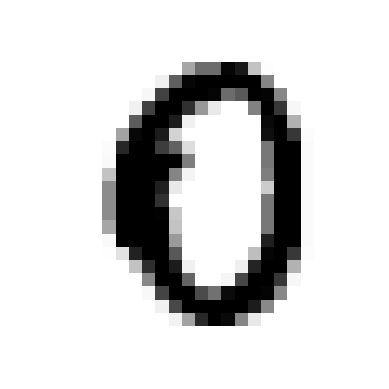

In [14]:
# İlk test resmini tahmin edin ve gösterin
logisticRegr.predict(test_img[0].reshape(1, -1))
showimage(test_img_copy, 0)

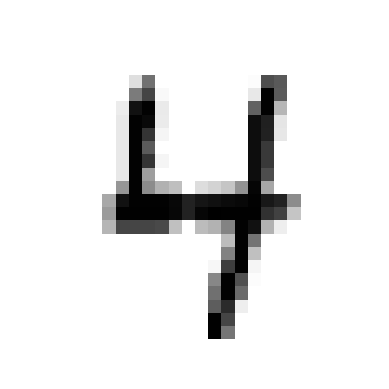

In [15]:
# İkinci test resmini tahmin edin ve gösterin
logisticRegr.predict(test_img[1].reshape(1, -1))
showimage(test_img_copy, 1)

Predicted Label: 1, Actual Label: 1


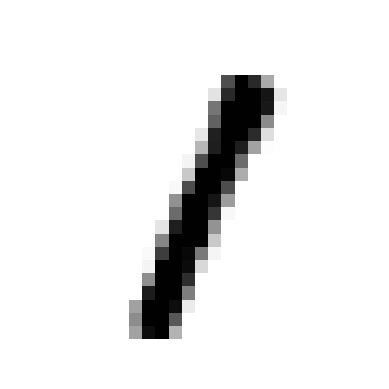

Predicted Label: 7, Actual Label: 7


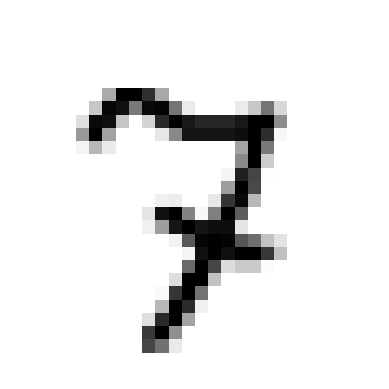

Predicted Label: 1, Actual Label: 1


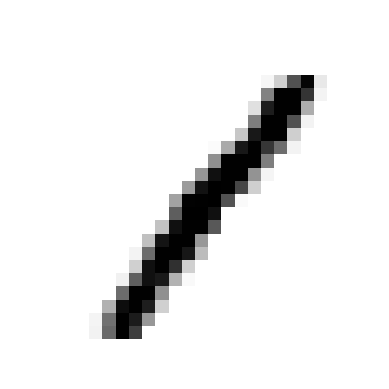

Predicted Label: 1, Actual Label: 1


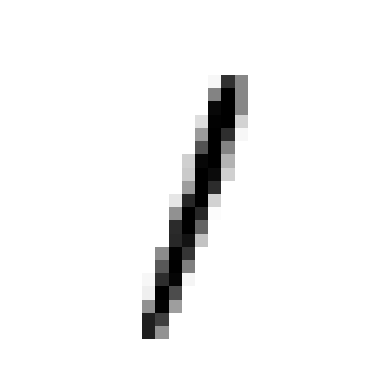

Predicted Label: 7, Actual Label: 7


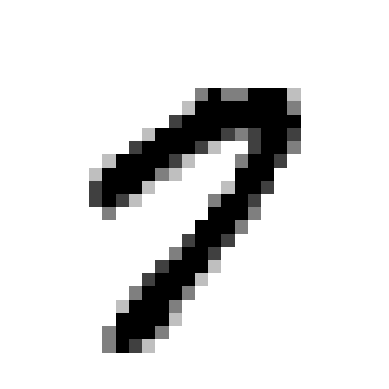

Model Accuracy: 91.84%


In [16]:
# Özel indekslerdeki test resimlerini gösterme ve tahmin sonuçlarını yazdırma
random_indices = [10, 100, 500, 1000, 1500]
for index in random_indices:
    predicted_label = logisticRegr.predict(test_img[index].reshape(1, -1))
    actual_label = test_lbl.iloc[index]
    
    # Tahmin sonuçlarını ve gerçek etiketleri göster
    print(f"Predicted Label: {predicted_label[0]}, Actual Label: {actual_label}")
    
    # Tahmin edilen rakamın resmini görüntüle
    showimage(test_img_copy, index)

# Modelin doğruluk oranını hesaplayın ve yazdırın
accuracy = logisticRegr.score(test_img, test_lbl)
print(f"Model Accuracy: {accuracy:.2%}")